**Load And Check Data**

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [ ]:
df=pd.read_csv('accepted_2007_to_2018Q4.csv', usecols = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
             "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'], low_memory = True)
print("Current shape of dataset :", df.shape)

Current shape of dataset : (2260701, 17)


In [ ]:
df.head(10)

,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,open_acc,pub_rec,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl
0,3600.0,13.99,C,10+ years,MORTGAGE,55000.0,Fully Paid,7.0,0.0,4.0,20701.0,1506.0,37.2,128.0,3.0,1.0,4.0
1,24700.0,11.99,C,10+ years,MORTGAGE,65000.0,Fully Paid,22.0,0.0,4.0,9733.0,57830.0,27.1,192.0,2.0,4.0,5.0
2,20000.0,10.78,B,10+ years,MORTGAGE,63000.0,Fully Paid,6.0,0.0,6.0,31617.0,2737.0,55.9,184.0,14.0,5.0,3.0
3,35000.0,14.85,C,10+ years,MORTGAGE,110000.0,Current,13.0,0.0,2.0,23192.0,54962.0,12.1,87.0,2.0,1.0,5.0
4,10400.0,22.45,F,3 years,MORTGAGE,104433.0,Fully Paid,12.0,0.0,10.0,27644.0,4567.0,77.5,210.0,4.0,6.0,6.0
5,11950.0,13.44,C,4 years,RENT,34000.0,Fully Paid,5.0,0.0,0.0,2560.0,844.0,91.0,54.0,32.0,0.0,3.0
6,20000.0,9.17,B,10+ years,MORTGAGE,180000.0,Fully Paid,12.0,0.0,6.0,30030.0,0.0,102.9,306.0,10.0,4.0,6.0
7,20000.0,8.49,B,10+ years,MORTGAGE,85000.0,Fully Paid,8.0,0.0,4.0,17700.0,13674.0,5.7,55.0,32.0,3.0,2.0
8,10000.0,6.49,A,6 years,RENT,85000.0,Fully Paid,14.0,1.0,7.0,1997.0,8182.0,50.1,129.0,1.0,1.0,9.0
9,8000.0,11.48,B,10+ years,MORTGAGE,42000.0,Fully Paid,8.0,0.0,5.0,28528.0,9966.0,41.4,253.0,15.0,1.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   funded_amnt            float64
 1   int_rate               float64
 2   grade                  object 
 3   emp_length             object 
 4   home_ownership         object 
 5   annual_inc             float64
 6   loan_status            object 
 7   open_acc               float64
 8   pub_rec                float64
 9   acc_open_past_24mths   float64
 10  avg_cur_bal            float64
 11  bc_open_to_buy         float64
 12  bc_util                float64
 13  mo_sin_old_rev_tl_op   float64
 14  mo_sin_rcnt_rev_tl_op  float64
 15  mort_acc               float64
 16  num_actv_rev_tl        float64
dtypes: float64(13), object(4)
memory usage: 293.2+ MB


In [ ]:
# Check missing value 
df.isnull().sum()

funded_amnt                  33
int_rate                     33
grade                        33
emp_length               146940
home_ownership               33
annual_inc                   37
loan_status                  33
open_acc                     62
pub_rec                      62
acc_open_past_24mths      50063
avg_cur_bal               70379
bc_open_to_buy            74968
bc_util                   76104
mo_sin_old_rev_tl_op      70310
mo_sin_rcnt_rev_tl_op     70310
mort_acc                  50063
num_actv_rev_tl           70309
dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

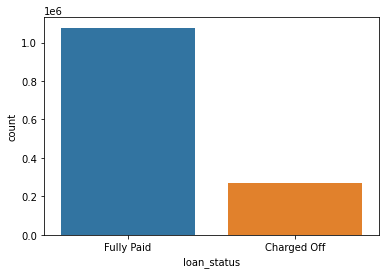

In [ ]:
data_with_loanstatus_sliced = df[(df['loan_status']=="Fully Paid") | (df['loan_status']=="Charged Off")]
sns.countplot(x=data_with_loanstatus_sliced['loan_status'])

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

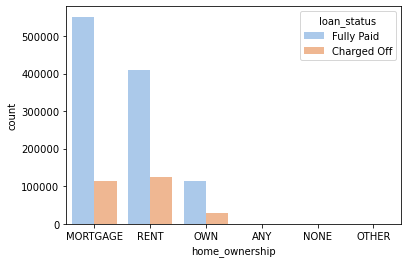

In [ ]:
sns.countplot(x=data_with_loanstatus_sliced.home_ownership,data=data_with_loanstatus_sliced,palette='pastel',hue='loan_status')
data_with_loanstatus_sliced.home_ownership.value_counts()

<AxesSubplot:xlabel='grade', ylabel='count'>

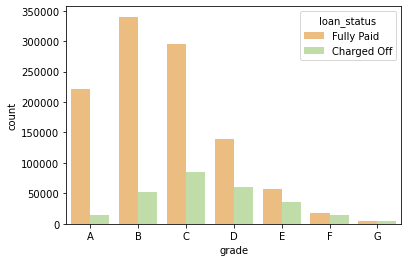

In [ ]:
Order=sorted(data_with_loanstatus_sliced.grade.unique())
sns.countplot(x=data_with_loanstatus_sliced.grade,data=data_with_loanstatus_sliced,order=Order,palette='Spectral',hue='loan_status')

In [ ]:
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})
Final_data= Dataset_withBoolTarget.reset_index(drop=True)
Final_data.head(10)

,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,open_acc,pub_rec,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl
0,3600.0,13.99,C,10+ years,MORTGAGE,55000.0,0,7.0,0.0,4.0,20701.0,1506.0,37.2,128.0,3.0,1.0,4.0
1,24700.0,11.99,C,10+ years,MORTGAGE,65000.0,0,22.0,0.0,4.0,9733.0,57830.0,27.1,192.0,2.0,4.0,5.0
2,20000.0,10.78,B,10+ years,MORTGAGE,63000.0,0,6.0,0.0,6.0,31617.0,2737.0,55.9,184.0,14.0,5.0,3.0
3,10400.0,22.45,F,3 years,MORTGAGE,104433.0,0,12.0,0.0,10.0,27644.0,4567.0,77.5,210.0,4.0,6.0,6.0
4,11950.0,13.44,C,4 years,RENT,34000.0,0,5.0,0.0,0.0,2560.0,844.0,91.0,54.0,32.0,0.0,3.0
5,20000.0,9.17,B,10+ years,MORTGAGE,180000.0,0,12.0,0.0,6.0,30030.0,0.0,102.9,306.0,10.0,4.0,6.0
6,20000.0,8.49,B,10+ years,MORTGAGE,85000.0,0,8.0,0.0,4.0,17700.0,13674.0,5.7,55.0,32.0,3.0,2.0
7,10000.0,6.49,A,6 years,RENT,85000.0,0,14.0,1.0,7.0,1997.0,8182.0,50.1,129.0,1.0,1.0,9.0
8,8000.0,11.48,B,10+ years,MORTGAGE,42000.0,0,8.0,0.0,5.0,28528.0,9966.0,41.4,253.0,15.0,1.0,3.0
9,1400.0,12.88,C,3 years,MORTGAGE,64000.0,0,17.0,0.0,4.0,19159.0,7940.0,77.0,234.0,18.0,4.0,11.0


In [ ]:
numeric_ = Final_data.select_dtypes(exclude=['object']).copy()
print(numeric_.shape)
numeric_.sample(5)

(1345310, 14)


,funded_amnt,int_rate,annual_inc,loan_status,open_acc,pub_rec,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl
1290440,2000.0,13.49,49200.0,0,11.0,0.0,8.0,9601.0,1677.0,77.6,153.0,3.0,0.0,3.0
1245863,18000.0,9.49,70000.0,0,10.0,0.0,4.0,3187.0,6064.0,65.7,232.0,5.0,0.0,6.0
765787,21000.0,7.69,80000.0,0,6.0,0.0,2.0,5592.0,29795.0,38.8,323.0,22.0,1.0,4.0
632168,30000.0,15.31,170000.0,0,13.0,0.0,5.0,4258.0,24541.0,56.7,93.0,4.0,0.0,10.0
728244,6250.0,11.67,30000.0,0,17.0,1.0,9.0,6080.0,9012.0,35.6,101.0,4.0,0.0,9.0


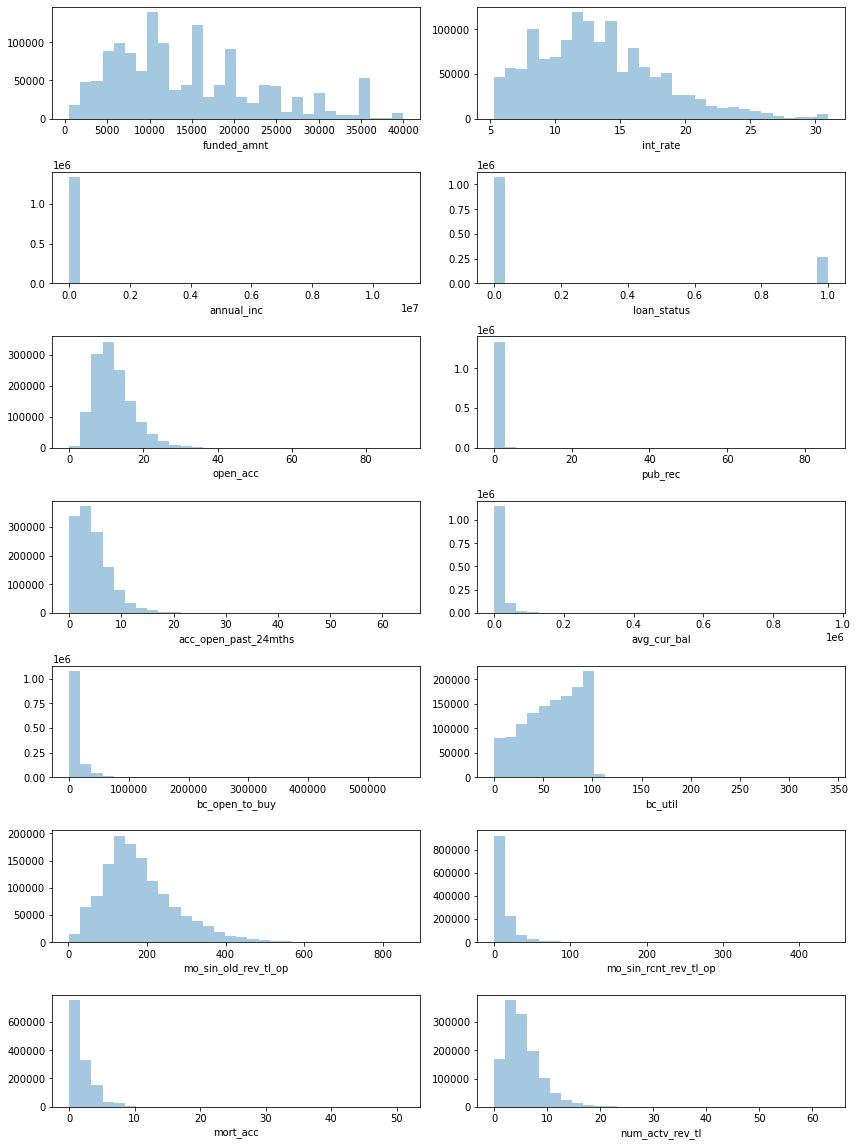

In [ ]:
fig = plt.figure(figsize=(12,16))
for index,col in enumerate(numeric_):
    plt.subplot(7,2,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False,bins=30)
fig.tight_layout(pad=1.0)

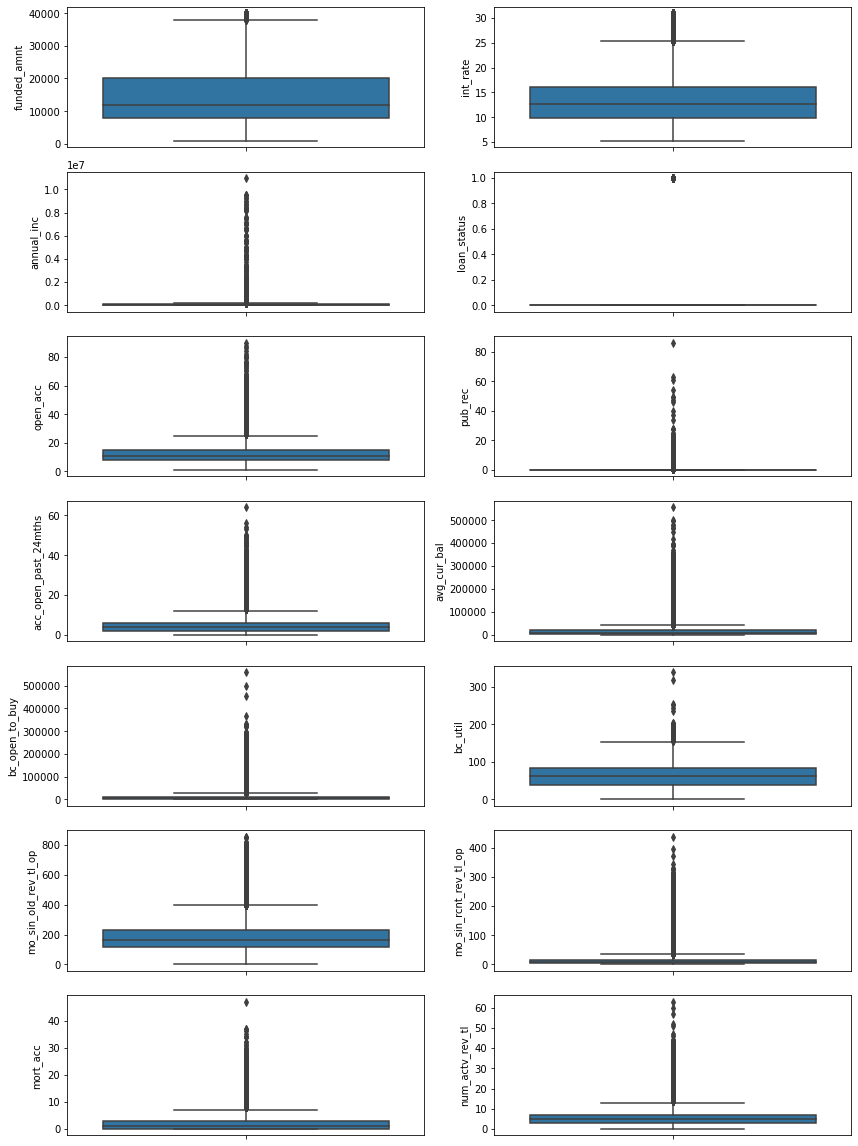

In [ ]:
fig = plt.figure(figsize=(12,16))
for index,col in enumerate(numeric_):
    plt.subplot(7,2,index+1)
    sns.boxplot(data = numeric_.dropna(), y = col)
fig.tight_layout(pad=1.0)

**Data Transformation**

In [ ]:
#Data encoding
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
print("Current shape of dataset :",Final_data.shape)
Final_data.head()

Current shape of dataset : (1345310, 17)


,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,open_acc,pub_rec,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl
0,3600.0,13.99,5,10,6,55000.0,0,7.0,0.0,4.0,20701.0,1506.0,37.2,128.0,3.0,1.0,4.0
1,24700.0,11.99,5,10,6,65000.0,0,22.0,0.0,4.0,9733.0,57830.0,27.1,192.0,2.0,4.0,5.0
2,20000.0,10.78,6,10,6,63000.0,0,6.0,0.0,6.0,31617.0,2737.0,55.9,184.0,14.0,5.0,3.0
3,10400.0,22.45,2,3,6,104433.0,0,12.0,0.0,10.0,27644.0,4567.0,77.5,210.0,4.0,6.0,6.0
4,11950.0,13.44,5,4,5,34000.0,0,5.0,0.0,0.0,2560.0,844.0,91.0,54.0,32.0,0.0,3.0


**Filling Missing values**

In [ ]:
Final_data.fillna(Final_data.mean(),inplace = True)
HTML(Final_data.tail().to_html())
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (1345310, 17)


In [ ]:
Final_data.isnull().sum()

funded_amnt                  0
int_rate                     0
grade                        0
emp_length               78511
home_ownership               0
annual_inc                   0
loan_status                  0
open_acc                     0
pub_rec                      0
acc_open_past_24mths         0
avg_cur_bal                  0
bc_open_to_buy               0
bc_util                      0
mo_sin_old_rev_tl_op         0
mo_sin_rcnt_rev_tl_op        0
mort_acc                     0
num_actv_rev_tl              0
dtype: int64

In [ ]:
Final_data=Final_data.dropna()
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (1266799, 17)


In [ ]:
Final_data.isnull().sum()

funded_amnt              0
int_rate                 0
grade                    0
emp_length               0
home_ownership           0
annual_inc               0
loan_status              0
open_acc                 0
pub_rec                  0
acc_open_past_24mths     0
avg_cur_bal              0
bc_open_to_buy           0
bc_util                  0
mo_sin_old_rev_tl_op     0
mo_sin_rcnt_rev_tl_op    0
mort_acc                 0
num_actv_rev_tl          0
dtype: int64

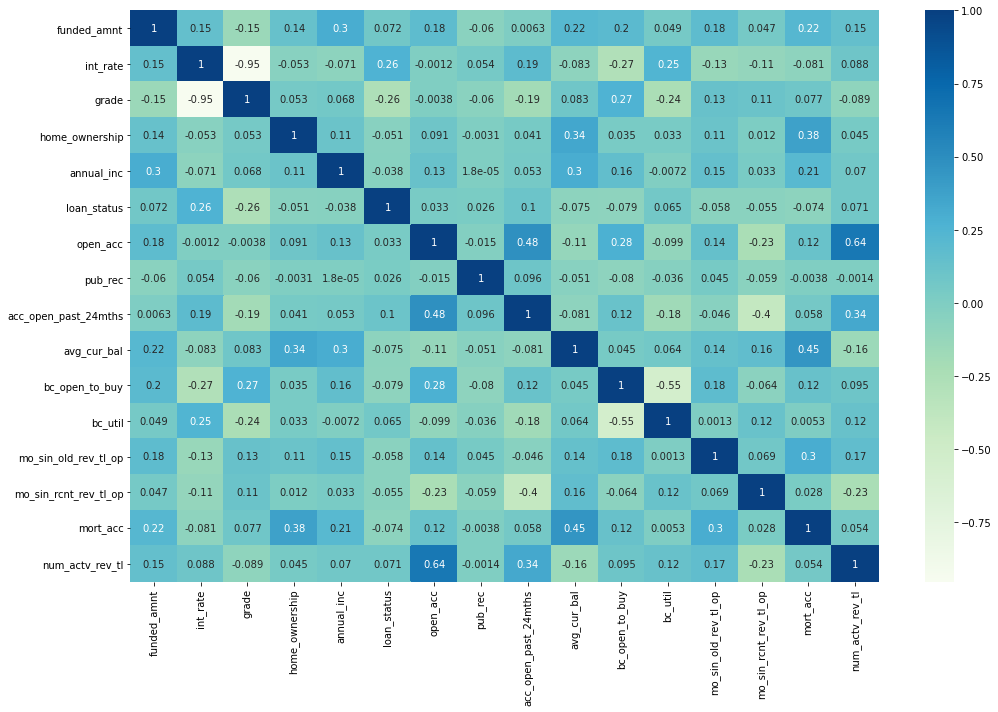

In [ ]:
#Biểu đồ tự tương quan
correlation = Final_data.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='GnBu')
fig.tight_layout()

**Logistic Regression**

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
X = Final_data.drop(["loan_status"],axis=1)
y = Final_data["loan_status"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((886759, 16), (380040, 16), (886759,), (380040,))

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
pred_lr = model.predict(X_test)
print('-'*30)
print('Accuracy of Logistic Regression: {:.2f}'.format(accuracy_score(pred_lr,y_test)*100))
print('-'*40)

------------------------------
Accuracy of Logistic Regression: 80.55
----------------------------------------


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
pred_lr = model.predict(X_test)
print('-'*30)
print('Accuracy of RandomForestClassifier: {:.2f}'.format(accuracy_score(pred_lr,y_test)*100))
print('-'*40)

------------------------------
Accuracy of RandomForestClassifier: 80.58
----------------------------------------
